<a href="https://colab.research.google.com/github/Y0306S/Q2/blob/main/LR_vs_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Exercise
Welcome! To ensure that the program runs smoothly, run each code cell from top to bottom without skipping any one. Downloading of the dataset file is optional. If you wish to have a look at the dataset file, you may download it from here:

https://data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view


The following cell contains utility code. Please run it once.


In [1]:
# Utilities Cell (run before loading dataset)
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

def median_storey(text):
    if pd.isna(text):
        return None

    # Expect format like "04 TO 06" or "10 TO 12"
    match = re.match(r"(\d+)\s+TO\s+(\d+)", text.strip())
    if match:
        low, high = map(int, match.groups())
        return (low + high) // 2   # median as integer (floor division)

    # If it's just a single number like "12"
    try:
        return int(text)
    except ValueError:
        return None

def to_years(text):
    if pd.isna(text):
        return None

    text = str(text).strip()  # ensure it's a string

    match = re.match(r"(\d+)\s+years?\s+(\d+)\s+months?", text)
    if match:
        years, months = match.groups()
        return int(years) + int(months) / 12

    # Handle cases like "62 years" or "5 months"
    match_year = re.match(r"(\d+)\s+years?", text)
    match_month = re.match(r"(\d+)\s+months?", text)
    if match_year:
        return float(match_year.group(1))
    if match_month:
        return int(match_month.group(1)) / 12

    # If it's just a number already (int/float in str form)
    try:
        return float(text)
    except ValueError:
        return None


# Loading Dataset into Google Colab
To make use of the dataset that we have just downloaded, let's load it into google colab using the pandas library

In [2]:
# Load the CSV file

url = "https://drive.google.com/uc?export=download&id=1mVsb0RickD5LNG6jY2CJfaj1obUM_tTx"
df = pd.read_csv(url)

# Visualise the first 5 rows (row 0 - row 4) of the dataset
print(df.head())

     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.

# Data Processing and Cleaning
Based on the output above, we can see that we have both quantitative and categorical data.`

***Quantitative variables*** - continuous and can be measured e.g floor_area_sqm, remaining_lease, resale_price etc.

***Categorical variables*** - flat_type, block, street_name etc.

In [3]:
categorical_columns = [
    'month', 'town', 'flat_type', 'block', 'street_name', 'flat_model'
]

df_cleaned = df.drop(columns=categorical_columns, errors='ignore')
lease_col = df_cleaned.columns[3]
storey_col = df_cleaned.columns[0]

df_cleaned[lease_col] = df_cleaned[lease_col].apply(to_years)
df_cleaned[storey_col] = df_cleaned[storey_col].apply(median_storey)


print(df_cleaned.head())


   storey_range  floor_area_sqm  lease_commence_date  remaining_lease  \
0            11            44.0                 1979        61.333333   
1             2            67.0                 1978        60.583333   
2             2            67.0                 1980        62.416667   
3             5            68.0                 1980        62.083333   
4             2            67.0                 1980        62.416667   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.0  
4      265000.0  


# Train Test Split
In machine learning, a rule of thumb is that we split our dataset into an 80-20% split for training data and test data respectively. The model will be trained on the training set and subsequently evaluated using the test set. This is to ensure that our model is not overfitted.

Imagine your exact tutorial questions coming out for final exams! Students will definitely do well. However the exam would not be a good indicator of whether students have truly learnt and understood all concepts taught during the course.

In [ ]:
# Split DataFrame into train and test sets (80% train, 20% test, random state jumbles up the dataset for us)
df_train, df_test = train_test_split(df_cleaned, test_size=0.2, random_state=57)

print("Train and Test data split successfully!")
print(f"Train set rows: {len(df_train)}")
print(f"Test set rows: {len(df_test)}")

# Model Training Utility Code (run this once)
Utility code for Model Training. You may explore the code in your own time

In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    return model, (r2_train, rmse_train, r2_test, rmse_test)


# 2. Prepare regression line range for plotting
def get_regression_line(model, X_train, X_test):
    x_range = np.linspace(
        min(X_train.min(), X_test.min()),
        max(X_train.max(), X_test.max()),
        500
    ).reshape(-1, 1)
    y_range = model.predict(x_range)
    return x_range, y_range


# 3. Plot results
def plot_results(X_train, y_train, X_test, y_test, model, metrics, x_range, y_range):
    r2_train, rmse_train, r2_test, rmse_test = metrics

    fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

    # Training subplot
    sns.scatterplot(x=X_train.flatten(), y=y_train, alpha=0.4, s=25,
                    label="Training Data", ax=axes[0])
    axes[0].plot(x_range, y_range, color="red", linewidth=2, label="Regression Line")
    axes[0].set_title(f"Training Set\nR² = {r2_train:.3f}, RMSE = {rmse_train:.0f}", fontsize=13)
    axes[0].set_xlabel("Remaining Lease (Years)")
    axes[0].set_ylabel("Resale Price (SGD)")
    axes[0].legend()
    axes[0].grid(True, linestyle="--", alpha=0.6)

    # Test subplot
    sns.scatterplot(x=X_test.flatten(), y=y_test, alpha=0.4, s=25,
                    label="Test Data", ax=axes[1])
    axes[1].plot(x_range, y_range, color="red", linewidth=2, label="Regression Line")
    axes[1].set_title(f"Test Set\nR² = {r2_test:.3f}, RMSE = {rmse_test:.0f}", fontsize=13)
    axes[1].set_xlabel("Remaining Lease (Years)")
    axes[1].legend()
    axes[1].grid(True, linestyle="--", alpha=0.6)

    plt.suptitle(f"Linear Regression: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}", fontsize=15, y=1.02)
    plt.tight_layout()
    plt.show()

# Model Training on Training data (remaining_lease to predict resale_price)
The objective of this code block is to determine how heavily the variable 'remaining_lease' influences house prices using training data only. Let's see how well the model will do.

In [ ]:
# --- TRAINING ---
X_train = df_train[[lease_col]].dropna().values
y_train = df_train[df_train.columns[-1]].dropna().values
X_test = df_test[[lease_col]].dropna().values
y_test = df_test[df_test.columns[-1]].dropna().values

# Train + evaluate on test data
model, metrics = train_and_evaluate(X_train, y_train, X_test, y_test)

# Get regression line
x_range, y_range = get_regression_line(model, X_train, X_test)

# Plot
plot_results(X_train, y_train, X_test, y_test, model, metrics, x_range, y_range)

# Question
Take note of the equation that we have derived for the best-fit line.
Based on the outputs shown above,  

1.   What can you conclude about the model?
2.   How would you interpret the R² and RMSE score?

# Mini Exercise (Optional)
Previously, we used the varible 'remaining_lease' to predict the resale price of HDB flats. In this code block, you will train the model to use 'floor_area_sqm' to predict 'resale_price'.

  # Mini Exercise Task
The code for training the linear regression model has been written for you.
Fill in the blanks for the next code cell to evaluate the model on the 'test' dataset. **You do not need to add any extra lines of code**.

Hint: the variable names of the train and test cells are similar. You may refer to the 'training cell' to fill in the blanks

In [ ]:
# -- TRAINING --
X = df_train[["floor_area_sqm"]].dropna().values   # must be 2D for sklearn
y = df_train[df_train.columns[-1]].dropna().values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Compute R²
r2_train = r2_score(y, y_pred)
rmse_train = root_mean_squared_error(y, y_pred)

# Plot scatter
plt.figure(figsize=(10,6))
sns.scatterplot(x=X.flatten(), y=y, alpha=0.4, s=30)

# Plot regression line
x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color="red", linewidth=2)

# Titles & labels
plt.title(
    f"floor_area_sqm vs Resale Price (Training Set)\n"
    f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, \nR² = {r2_train:.3f}, RMSE = {rmse_train:.3f}",
    fontsize=14
)
plt.xlabel("Floor Area (sqm)", fontsize=12)
plt.ylabel("Resale Price (SGD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
# --- TESTING ---
X_test = df_test[["floor_area_sqm"]].dropna().values   # must be 2D for sklearn
y_test = df_test[______.columns[-1]].dropna().values

# Fit linear regression model
y_test_pred = model.predict(______)

# Compute R²
r2_test = r2_score(______,______)
rmse_test = root_mean_squared_error(______, ______)


# --- Plotting test results ---
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test.flatten(), y=y_test, alpha=0.4, s=30, label="Test Data")

# Regression line (same line from training model)
x_range = np.linspace(______.min(), ______.max(), 500).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color="red", linewidth=2, label="Regression Line (from train)")

plt.title(
    f"Remaining Lease vs Resale Price (Test Set)\n"
    f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, R² = {r2_test:.3f}, RMSE = {rmse_test:.3f}",
    fontsize=14
)
plt.xlabel("Remaining Lease (Years)", fontsize=12)
plt.ylabel("Resale Price (SGD)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
______

# Utility Code for Multiple Linear Regression (run this once)
you may explore the functions in your own time

In [ ]:
# 1. Data preparation
def prepare_data(df, features, target, test_size=0.2, random_state=57):
    df_model = df[features + [target]].dropna()
    X = df_model[features].values
    y = df_model[target].values
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


# 2. Train and evaluate model
def train_and_evaluate(X_train, X_test, y_train, y_test, features):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    # Print summary
    print(f"Test R²: {r2:.3f}")
    print(f"Test RMSE: {rmse:.2f}")
    print("Coefficients:", dict(zip(features, model.coef_)))
    print("Intercept:", model.intercept_)
    print(
        f"y = {model.coef_[0]:.2f}x1 + {model.coef_[1]:.2f}x2 + "
        f"{model.coef_[2]:.2f}x3 + {model.coef_[3]:.2f}x4 + {model.intercept_:.2f}"
    )

    return model, y_pred, r2, rmse


# 3. Visualization
def plot_results(y_test, y_pred, r2, rmse):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color="red", linestyle="--", linewidth=2, label="Perfect Fit")
    plt.xlabel("Actual Resale Price")
    plt.ylabel("Predicted Resale Price")
    plt.title(f"Multiple Linear Regression\nR² = {r2:.3f}, RMSE = {rmse:.0f}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Linear Regression with 4 predictor variables
Based on the course slides that you have seen previously, having 2 predictor variables will require your linear regression results to be plotted in a 3D graph as follows:

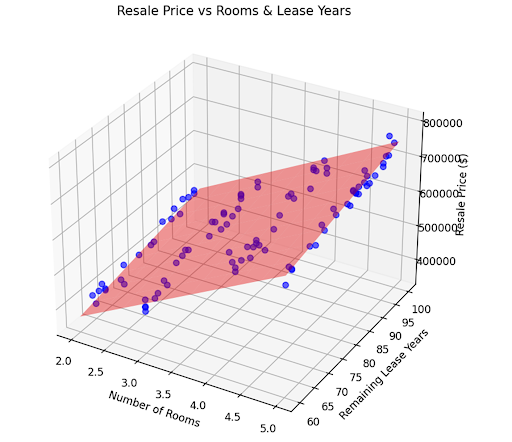

However, as we have 4 independant variables in this case, we would technically have to show our results on a **5-dimensional graph** but that is not possible. To solve this issue, we will plot the **actual retail prices (x-axis)** against the **predictions (y-axis)** for all datapoints in our dataset.

In [ ]:
# --- Define features and target ---
features = ["storey_range", "floor_area_sqm", "lease_commence_date", "remaining_lease"]
target = "resale_price"

# Prepare data
X_train, X_test, y_train, y_test = prepare_data(df_cleaned, features, target)

# Train & evaluate
model, y_pred, r2, rmse = train_and_evaluate(X_train, X_test, y_train, y_test, features)

# Visualize
plot_results(y_test, y_pred, r2, rmse)


# Multiple Linear Regression Result
Based on the results above, we
get R² = 0.648 and RMSE = 108767.
Hence we can say that our linear regression line accounts for approximately 64.8% of the factors that determine retail price, and for any set of values of the independant variables, the model's prediction will deviate from the actual retail price by about $108767.

# Model Deployment
In the following code cell, a random row within the dataset is selected and the values of the independant variables will be substituted into the linear regression equation that we have obtained above. The code will pick a random row everytime it is ran. You may run the code as many times as you like!

In [ ]:
# --- Define the independent variables (same as in your model) ---
features = ["storey_range", "floor_area_sqm", "lease_commence_date", "remaining_lease"]
target = "resale_price"

# Pick a random row (independent + target)
random_row = df_cleaned[features + [target]].dropna().sample(1, random_state=None)

# Extract features
X_new = random_row[features].values

# Model prediction
predicted_price = model.predict(X_new)[0]

# Actual resale price
actual_price = random_row[target].values[0]

#Calculate the error in the prediction
prediction_error = abs(predicted_price - actual_price)

print("Randomly selected row:")
print(random_row)

print(f"\nPredicted Resale Price: ${predicted_price:,.0f}")
print(f"Actual Resale Price:    ${actual_price:,.0f}")

print(f"Prediction Error: ${prediction_error:,.0f}")

# Task
Create a simple neural network model using the existing `df_train` and `df_test` data, train it, evaluate its performance, and compare its results with the previously generated linear regression model.

## Prepare data for neural network

### Subtask:
Split the cleaned data into training and testing sets (if not already done in a way suitable for the neural network). Ensure the data is scaled appropriately for the neural network.


Utility code for Model Training. You may explore the code in your own time

In [ ]:
def ScaleData(X_train, X_test, y_train, y_test):
  # Instantiate scalers
  scaler_X = StandardScaler()
  scaler_y = StandardScaler()

  # Scale features
  X_train_scaled = scaler_X.fit_transform(X_train)
  X_test_scaled = scaler_X.transform(X_test)

  # Scale target
  # Reshape y for scaling
  y_train_reshaped = y_train.values.reshape(-1, 1)
  y_test_reshaped = y_test.values.reshape(-1, 1)

  y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
  y_test_scaled = scaler_y.transform(y_test_reshaped)
  return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y


**Reasoning**:
The subtask requires splitting and scaling the data for a neural network. This involves separating features and the target, splitting into train/test sets, and applying StandardScaler. All these steps can be grouped into a single code block.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify features and target
features = ["storey_range", "floor_area_sqm", "lease_commence_date", "remaining_lease"]
target = "resale_price"

# Use the existing train and test sets
X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y = ScaleData(X_train, X_test, y_train, y_test)


# Print shapes to verify
print("Data splitting and scaling completed successfully.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")

## Build the neural network

### Subtask:
Define a simple neural network architecture using a library like pytorch.



**Reasoning**:
Define a simple neural network architecture using Pytorch Sequential model with Dense layers for Linear Regression.



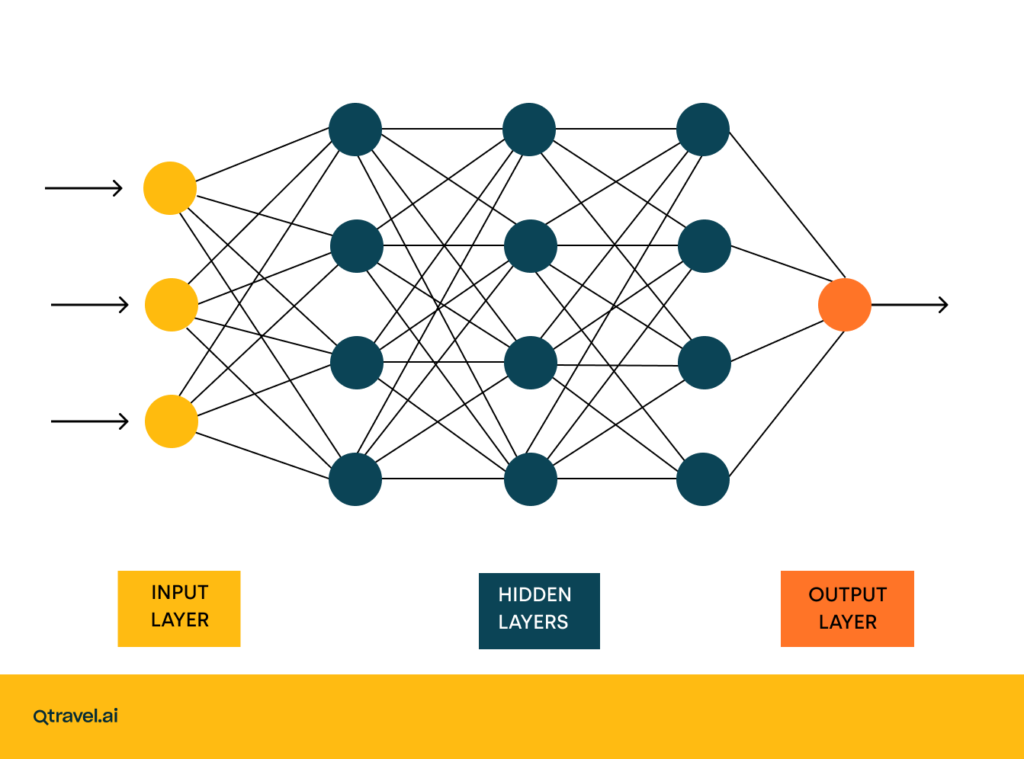

In [ ]:
import torch
import torch.nn as nn

model_simple = nn.Sequential(
    nn.Linear(X_train_scaled.shape[1], 16), # 1 hidden layer with 16 neurons
    nn.ReLU(), # ReLU activation for non-linearity
    nn.Linear(16, 1) # 1 output neuron (linear activation) for regression
)
print(model_simple)


## Train the neural network

### Subtask:
Compile and train the neural network model on the training data.


![](https://storage.googleapis.com/kaggle-media/learn/images/a86utxY.gif)

**Reasoning**:
Compile and train the neural network model using the specified optimizer, loss function, epochs, batch size, and validation split.


Epoch – One full pass through the entire training dataset.

Forward pass – The input data flows through the network to produce predictions.

Loss – Measures how far the predictions are from the true values.

Backward pass (backpropagation) – Computes the gradient of the loss w.r.t each parameter.

Optimizer step – Updates the model’s weights using the gradients to reduce the loss.

In [ ]:
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split

# Loss & optimizer
criterion = nn.MSELoss() # mean squared error
optimizer = optim.Adam(model_simple.parameters(), lr=0.01) # Adam optimizer : adjust weights to minimize loss

# Convert data to tensors
X_train_pt = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_pt = torch.tensor(y_train_scaled, dtype=torch.float32).view(-1, 1)
X_test_pt  = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_pt  = torch.tensor(y_test_scaled, dtype=torch.float32).view(-1, 1)

# Use DataLoader for minibatch training
train_dataset = TensorDataset(X_train_pt, y_train_pt)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
epochs = 10
print("Starting training...")
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        outputs = model_simple(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad() # Clear old gradients
        loss.backward() # compute new gradients
        optimizer.step() # update model parameters using computed gradients

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Training complete ")

Convert data to tensors:
Neural networks in PyTorch work with a data structure called tensors. Tensors are similar to NumPy arrays but are optimized for operations on GPUs and for calculating gradients (which is essential for training neural networks).

DataLoader: Training a neural network on the entire dataset at once can be computationally expensive and memory-intensive, especially with large datasets. Minibatch training is a common technique where the training data is divided into smaller batches, and the model's weights are updated after processing each batch.


## Evaluate the neural network

### Subtask:
Evaluate the trained neural network on the test data using appropriate metrics like R² and RMSE.

**Reasoning**:
Evaluate the neural network model's performance on the test set by predicting resale prices and computing R² and RMSE, similar to how the linear regression model was evaluated.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import torch

# Evaluation
model_simple.eval()
with torch.no_grad():
    y_pred_test_scaled = model_simple(X_test_pt).numpy()

# Inverse-transform back to original scale
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)
y_test_orig = scaler_y.inverse_transform(y_test_pt.numpy())

nn_r2 = r2_score(y_test_orig, y_pred_test)
nn_rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_test))

print(f"Neural Network Test R²: {nn_r2:.3f}")
print(f"Neural Network Test RMSE: {nn_rmse:.2f}")

## Compare Models

### Subtask:
Compare the performance metrics of the neural network and the linear regression model. Discuss the potential reasons for any observed differences.

**Reasoning**:
Compare the R² and RMSE values obtained from the linear regression model and the neural network model on the test set.

In [ ]:
print("--- Model Comparison ---")
print(f"Linear Regression Test R²: {r2:.3f}")
print(f"Linear Regression Test RMSE: {rmse:.2f}")
print(f"Neural Network Test R²: {nn_r2:.3f}")
print(f"Neural Network Test RMSE: {nn_rmse:.2f}")

The Neural Network model achieved a higher R² score and a lower RMSE on the test set compared to the Linear Regression model.

This suggests that the neural network was able to capture more of the variance in the resale prices and make more accurate predictions.
Potential reasons for this difference include:
- Neural networks can model non-linear relationships between features and the target, while linear regression is limited to linear relationships.
- With sufficient data and appropriate architecture, neural networks can learn complex patterns that linear models cannot.